In [4]:
import os
import glob
import xml.etree.ElementTree as ET
from PIL import Image

# Define paths
image_folders = ['n02085936-Maltese_dog', 'n02112706-Brabancon_griffon', 'n02086910-papillon', 'n02088466-bloodhound']
annotation_folders = ['n02085936-Maltese_dog', 'n02112706-Brabancon_griffon', 'n02086910-papillon', 'n02088466-bloodhound']

image_root_dir = 'C:/Users/HP/Downloads/DM_Assgn1/Standford Dogs Dataset/images/Images'
annotation_root_dir = 'C:/Users/HP/Downloads/DM_Assgn1/Standford Dogs Dataset/annotation/Annotation'
cropped_dir = "./Cropped/"

# Function to get bounding boxes from annotations
def get_bounding_boxes(annot):
    tree = ET.parse(annot)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox

# Process images and annotations
for folder_name in image_folders:
    # Get image and annotation paths for the current folder
    image_paths = glob.glob(os.path.join(image_root_dir, folder_name, '*'))
    annotation_paths = glob.glob(os.path.join(annotation_root_dir, folder_name, '*'))

    # Process each image and its corresponding annotation
    for image_path, annotation_path in zip(image_paths, annotation_paths):
        # Get bounding boxes from annotation
        bbox = get_bounding_boxes(annotation_path)

        # Open image
        image = Image.open(image_path)

        # Crop and resize images based on bounding boxes
        for j, box in enumerate(bbox):
            cropped_image = image.crop(box)
            cropped_image = cropped_image.resize((128, 128), Image.LANCZOS)
            breed_folder = os.path.basename(os.path.dirname(image_path))
            new_path = os.path.join(cropped_dir, breed_folder)
            os.makedirs(new_path, exist_ok=True)
            new_image_path = os.path.join(new_path, f"{os.path.splitext(os.path.basename(image_path))[0]}_{j}.jpg")
            cropped_image.save(new_image_path)


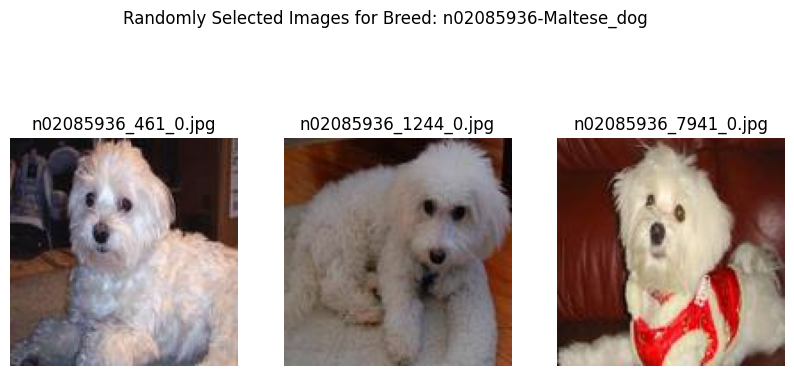

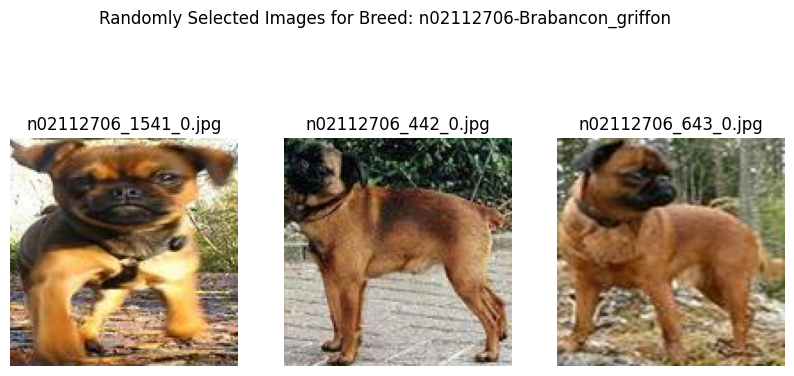

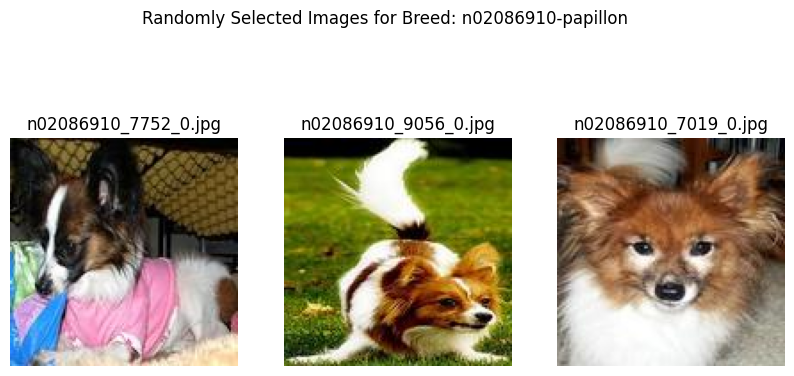

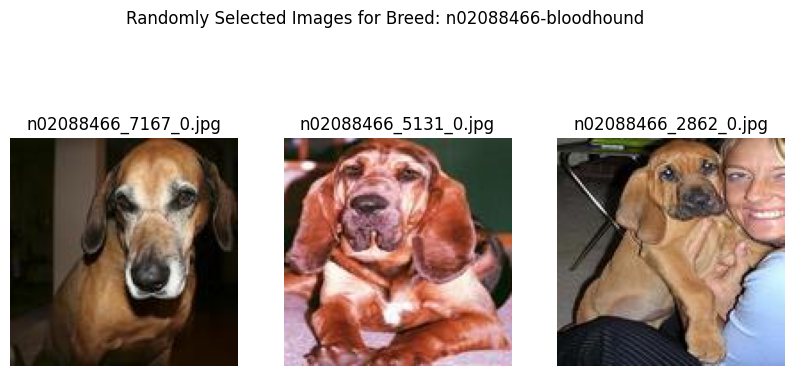

In [7]:
import random
import matplotlib.pyplot as plt

# Display randomly selected images
for folder_name in image_folders:
    breed_images = glob.glob(os.path.join(cropped_dir, folder_name, '*.jpg'))
    selected_images = random.sample(breed_images, min(3, len(breed_images)))
    plt.figure(figsize=(10, 5))
    for i, image_path in enumerate(selected_images):
        image = Image.open(image_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(image)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.suptitle(f"Randomly Selected Images for Breed: {folder_name}")
    plt.show()